# Installing the Libries

In [ ]:
!pip install earthengine-api

In [165]:
!apt-get install espeak

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  espeak-data libespeak1 libportaudio2 libsonic0
The following NEW packages will be installed:
  espeak espeak-data libespeak1 libportaudio2 libsonic0
0 upgraded, 5 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,382 kB of archives.
After this operation, 3,178 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libsonic0 amd64 0.2.0-11build1 [10.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 espeak-data amd64 1.48.15+dfsg-3 [1,085 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libespeak1 amd64 1.48.15+dfsg-3 [156 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 espeak amd64 1.48.15+dfsg-3 [64.2 kB]
Fetched 1,382 kB in 1s (1,500 

In [167]:

pip install pyttsx3

In [ ]:
pip install geopy

In [ ]:
pip install folium

In [ ]:
pip install pandas

In [ ]:
pip install geemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.5 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow

In [ ]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install xgboost


# Connect to Google Earth Engine via API

* Data Source :**Sentinel-5P OFFL CH4: Offline Methane**





* Data Source link : https://code.earthengine.google.com/?scriptPath=Examples%3ADatasets%2FCOPERNICUS%2FCOPERNICUS_S5P_OFFL_L3_CH4

* Data Source description : This dataset provides offline high-resolution imagery of methane concentrations.

Methane (CH4) is, after carbon dioxide (CO2), the most important contributor to the anthropogenically enhanced greenhouse effect. Roughly three-quarters of methane emissions are anthropogenic and as such it is important to continue the record of satellite based measurements. TROPOMI aims at providing CH4 column concentrations with high sensitivity to the Earth's surface, good spatiotemporal coverage, and sufficient accuracy to facilitate inverse modeling of sources and sinks. TROPOMI uses absorption information from the Oxygen-A Band (760nm) and the SWIR spectral range to monitor CH4 abundances in the Earth's atmosphere.

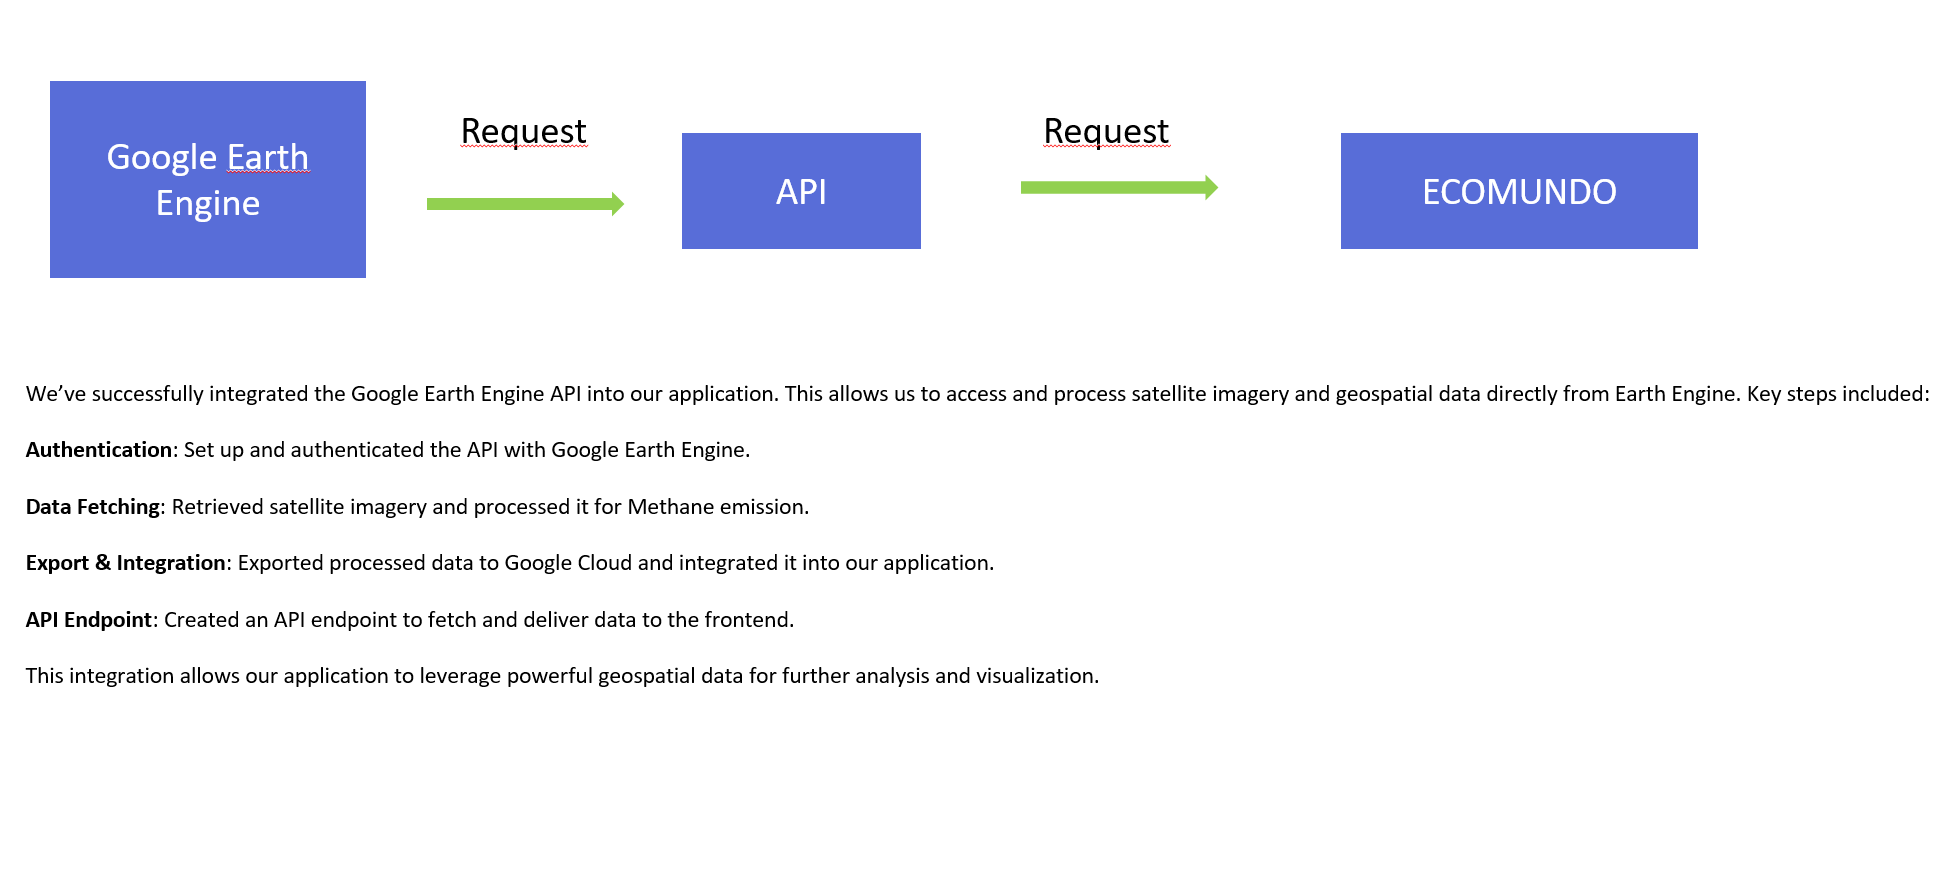

In [ ]:
import ee
ee.Authenticate()
ee.Initialize(project='ee-my-ecomondo')
 # ee-my-ecomondo is our project ID, Please request acces if you want to test by send email to f_faci@esi.dz



In [ ]:
# Define the ImageCollection for CH4 (Methane)
collection = ee.ImageCollection('COPERNICUS/S5P/NRTI/L3_CO') \
    .filterDate('2024-01-01', '2024-01-31')  #The desired date range

In [158]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="ecomondo")
location = geolocator.geocode("Finland")
latitude_=location.latitude
longitude_=location.longitude

In [159]:

roi = ee.Geometry.Point([longitude_, latitude_])

In [160]:



# Define the ImageCollection for CH4 (Methane) data
collection = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_CH4') \
# Check how many images are in the collection for the given date range
count = collection.size().getInfo()
print(f"Number of images in the collection: {count}")

# Optionally, visualize a sample image to ensure data exists
sample_image = collection.first()  # Get the first image in the collection
print(sample_image.getInfo())  # This will give details of the image


Number of images in the collection: 29164
{'type': 'Image', 'bands': [{'id': 'CH4_column_volume_mixing_ratio_dry_air', 'data_type': {'type': 'PixelType', 'precision': 'double'}, 'dimensions': [10000, 14000], 'crs': 'EPSG:4326', 'crs_transform': [0.01, 0, -20, 0, 0.01, -90]}, {'id': 'aerosol_height', 'data_type': {'type': 'PixelType', 'precision': 'double'}, 'dimensions': [10000, 14000], 'crs': 'EPSG:4326', 'crs_transform': [0.01, 0, -20, 0, 0.01, -90]}, {'id': 'aerosol_optical_depth', 'data_type': {'type': 'PixelType', 'precision': 'double'}, 'dimensions': [10000, 14000], 'crs': 'EPSG:4326', 'crs_transform': [0.01, 0, -20, 0, 0.01, -90]}, {'id': 'sensor_azimuth_angle', 'data_type': {'type': 'PixelType', 'precision': 'double'}, 'dimensions': [10000, 14000], 'crs': 'EPSG:4326', 'crs_transform': [0.01, 0, -20, 0, 0.01, -90]}, {'id': 'sensor_zenith_angle', 'data_type': {'type': 'PixelType', 'precision': 'double'}, 'dimensions': [10000, 14000], 'crs': 'EPSG:4326', 'crs_transform': [0.01, 0,

# MAP data visualization Sentinel-5P OFFL CH4: Offline Methane

In [ ]:
import ee
import geemap

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Define the image collection for methane data (CH4)
collection = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_CH4') \
    .select('CH4_column_volume_mixing_ratio_dry_air') \
    .filterDate('2019-06-01', '2019-07-16')

# Calculate the mean of the collection
mean_image = collection.mean()

# Define visualization parameters
vis_params = {
    'min': 1750,
    'max': 1900,
    'palette': ['black', 'blue', 'purple', 'cyan', 'green', 'yellow', 'red']
}

# Create a map with geemap
Map = geemap.Map(center=[0, 0], zoom=2)  # Center the map globally with a zoom level of 2

# Add the CH4 image layer to the map with the defined visualization
Map.addLayer(mean_image, vis_params, 'S5P CH4')

# Display the map
Map


Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

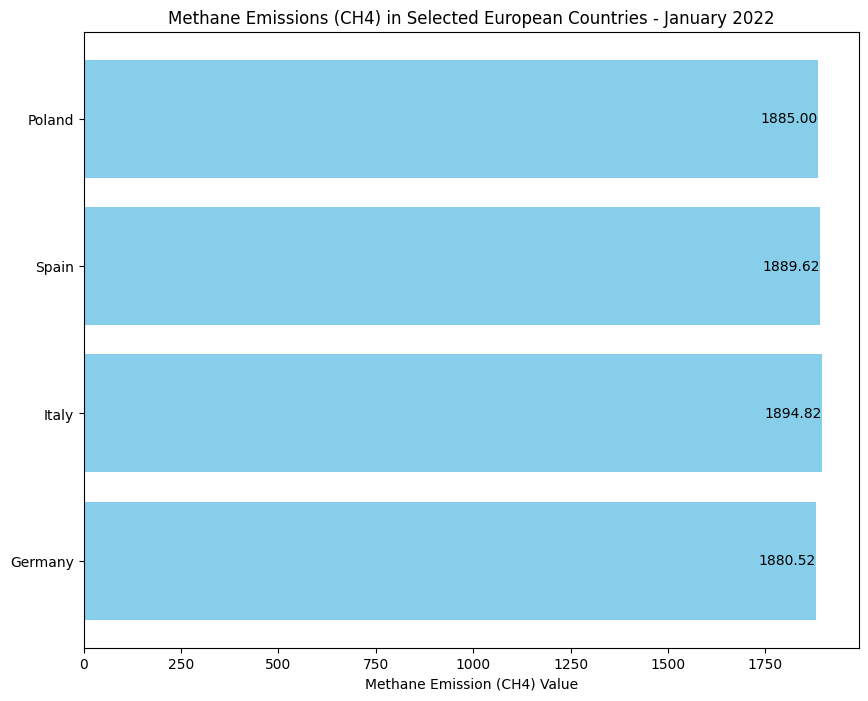

In [163]:
import ee
import pandas as pd
import matplotlib.pyplot as plt

# Authenticate and initialize Earth Engine API
ee.Authenticate()
ee.Initialize()

# List of 5 European countries for which to display CH4 emissions
countries = ['Finland', 'Germany', 'Italy', 'Spain', 'Poland']

# Load CH4 data from Sentinel-5P for a specific time range
ch4_data = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_CH4') \
    .select('CH4_column_volume_mixing_ratio_dry_air') \
    .filterDate('2022-01-01', '2022-01-31')  # Adjusted to January 2022 for testing

# Load the global countries shapefile
countries_shapefile = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017')

# Filter the countries of interest
europe_countries = countries_shapefile.filter(ee.Filter.inList('country_na', countries))

# Define a function to get the mean CH4 for a specific country
def get_ch4_by_country(country):
    country_geom = countries_shapefile.filter(ee.Filter.eq('country_na', country)).geometry()

    # Calculate mean CH4 value for the country
    region_ch4 = ch4_data.mean().reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=country_geom,
        scale=1000,  # Adjust the scale based on the region's resolution
        maxPixels=1e8
    ).getInfo()

    return region_ch4.get('CH4_column_volume_mixing_ratio_dry_air')

# Get CH4 emissions for the countries
ch4_values = {}
for country in countries:
    ch4_values[country] = get_ch4_by_country(country)

# Convert to DataFrame
df = pd.DataFrame(list(ch4_values.items()), columns=['Country', 'CH4_emission'])

# Drop countries with no emission data (if any)
df = df[df['CH4_emission'].notna()]

# Plot the bar chart for CH4 emissions (actual values, not percentages)
plt.figure(figsize=(10, 8))
plt.barh(df['Country'], df['CH4_emission'], color='skyblue')

# Add data labels on the bars
for index, value in enumerate(df['CH4_emission']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='right', color='black')

plt.xlabel('Methane Emission (CH4) Value')
plt.title('Methane Emissions (CH4) in Selected European Countries - January 2022')
plt.show()


Finland is not presented in the graph; due to the quality of data; this means that there is no data for Finland between 2022-01-01 and  2022-01-31

# CH4 Forcasting

In [ ]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Check the uploaded files
print(uploaded)


Saving DailyCH4Emission.csv to DailyCH4Emission.csv
{'DailyCH4Emission.csv': b'date,meantemp,humidity,CH4 emission,Production Volume\r\n2013-01-01,10.0,84.5,0.0,1015.6666666666666\r\n2013-01-02,7.4,92.0,2.98,1017.8\r\n2013-01-03,7.166666666666667,87.0,4.633333333333334,1018.6666666666666\r\n2013-01-04,8.666666666666666,71.33333333333333,1.2333333333333334,1017.1666666666666\r\n2013-01-05,6.0,86.83333333333333,3.6999999999999997,1016.5\r\n2013-01-06,7.0,82.8,1.48,1018.0\r\n2013-01-07,7.0,78.6,6.3,1020.0\r\n2013-01-08,8.857142857142858,63.714285714285715,7.142857142857143,1018.7142857142857\r\n2013-01-09,14.0,51.25,12.5,1017.0\r\n2013-01-10,11.0,62.0,7.3999999999999995,1015.6666666666666\r\n2013-01-11,15.714285714285714,51.285714285714285,10.571428571428571,1016.1428571428571\r\n2013-01-12,14.0,74.0,13.228571428571428,1015.5714285714286\r\n2013-01-13,15.833333333333334,75.16666666666667,4.633333333333334,1013.3333333333334\r\n2013-01-14,12.833333333333334,88.16666666666667,0.616666666666

In [ ]:
import pandas as pd

# Replace 'your_file.csv' with the name of the uploaded file
df = pd.read_csv('DailyCH4Emission.csv')

# Display the first few rows
print(df.head())


         date   meantemp   humidity  CH4 emission  Production Volume
0  2013-01-01  10.000000  84.500000      0.000000        1015.666667
1  2013-01-02   7.400000  92.000000      2.980000        1017.800000
2  2013-01-03   7.166667  87.000000      4.633333        1018.666667
3  2013-01-04   8.666667  71.333333      1.233333        1017.166667
4  2013-01-05   6.000000  86.833333      3.700000        1016.500000


In [ ]:
df = df[['date', 'Production Volume', 'humidity', 'CH4 emission']]

Time series predection

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming df is your dataframe and it contains a 'date' column and 'CH4 emission' column

# Step 1: Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Step 2: Convert 'date' to a numerical representation (e.g., days since the first date)
df['date_numeric'] = (df['date'] - df['date'].min()).dt.days

# Step 3: Define the features and target
X = df.loc[:, ['date_numeric']]  # features (numerical date values)
y = df.loc[:, 'CH4 emission']    # target (CH4 emissions)

# Step 4: Train the model
model = LinearRegression()
model.fit(X, y)

# Step 5: Store the fitted values as a time series with the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)

# Optionally, add predictions to the DataFrame for visualization
df['predicted_CH4_emission'] = y_pred

# Print the dataframe with the predictions
print(df)


           date  Production Volume    humidity  CH4 emission  date_numeric  \
0    2013-01-01        1015.666667   84.500000      0.000000             0   
1    2013-01-02        1017.800000   92.000000      2.980000             1   
2    2013-01-03        1018.666667   87.000000      4.633333             2   
3    2013-01-04        1017.166667   71.333333      1.233333             3   
4    2013-01-05        1016.500000   86.833333      3.700000             4   
...         ...                ...         ...           ...           ...   
1457 2016-12-28        1015.565217   68.043478      3.547826          1457   
1458 2016-12-29        1016.904762   87.857143      6.000000          1458   
1459 2016-12-30        1017.904762   89.666667      6.266667          1459   
1460 2016-12-31        1016.100000   87.000000      7.325000          1460   
1461 2017-01-01        1016.000000  100.000000      0.000000          1461   

      predicted_CH4_emission  
0                   6.997424  
1

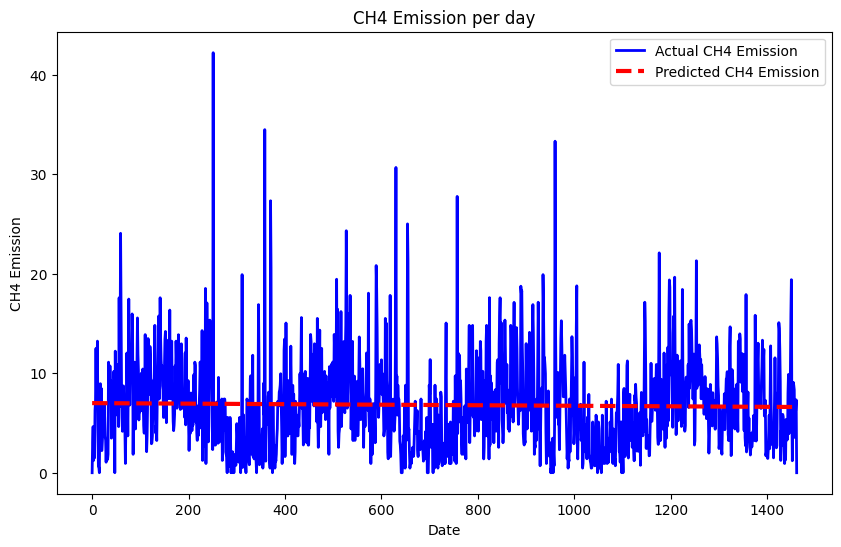

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'y' is the actual CH4 emission series and 'y_pred' is the predicted CH4 emission series

# Plotting the actual values and the predictions
fig, ax = plt.subplots(figsize=(10, 6))
y.plot(ax=ax, label='Actual CH4 Emission', color='blue', linestyle='-', linewidth=2)
y_pred.plot(ax=ax, label='Predicted CH4 Emission', color='red', linestyle='--', linewidth=3)

# Setting the title and labels
ax.set_title('CH4 Emission per day')
ax.set_xlabel('Date')
ax.set_ylabel('CH4 Emission')

# Adding a legend
ax.legend()

# Show the plot
plt.show()


Linear regression predection

Mean Absolute Error: 4.602201638205351
Mean Squared Error: 882.1517521590876
R-squared: -52.240066142036035


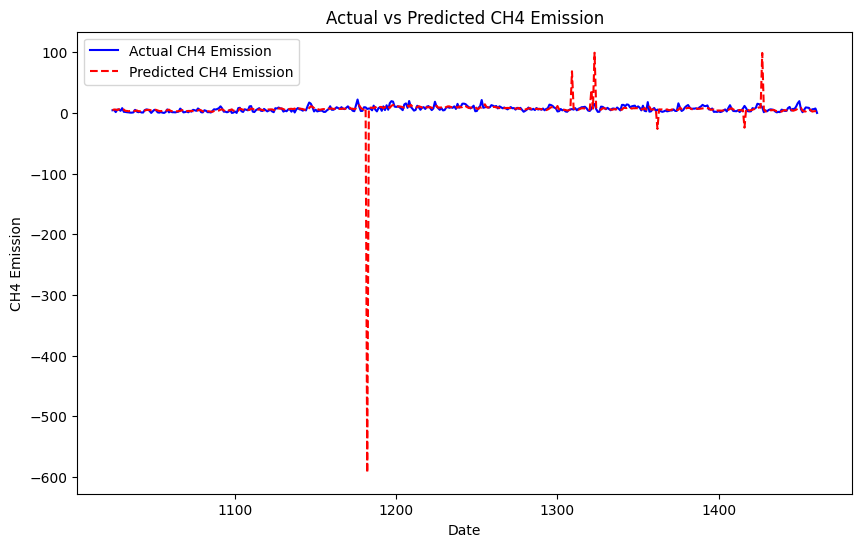

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming df is your dataframe with 'date', 'Production Volume', 'humidity', 'CH4 emission', and 'date_numeric'

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Create lag features for 'CH4 emission' (e.g., 1-day and 2-day lags)
df['CH4_lag_1'] = df['CH4 emission'].shift(1)
df['CH4_lag_2'] = df['CH4 emission'].shift(2)

# Extract date features (if needed)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday

# Drop missing values created by shifting or other operations
df = df.dropna()

# Define the features (X) and target (y)
X = df[['Production Volume', 'humidity', 'date_numeric', 'CH4_lag_1', 'CH4_lag_2', 'year', 'month', 'day', 'weekday']]
y = df['CH4 emission']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual CH4 Emission', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted CH4 Emission', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('CH4 Emission')
plt.title('Actual vs Predicted CH4 Emission')
plt.legend()
plt.show()


Random Forest predection

Random Forest Model
Mean Absolute Error: 2.9152012650834123
Mean Squared Error: 13.968062792911157
R-squared: 0.15699245039124443


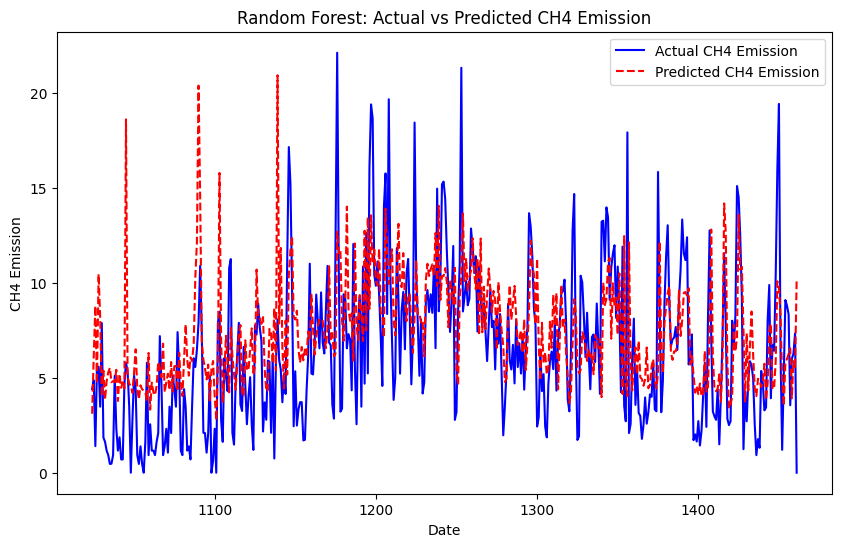

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the features (X) and target (y)
X = df[['Production Volume', 'humidity', 'date_numeric', 'CH4_lag_1', 'CH4_lag_2', 'year', 'month', 'day', 'weekday']]
y = df['CH4 emission']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Train the Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual CH4 Emission', color='blue')
plt.plot(y_test.index, y_pred_rf, label='Predicted CH4 Emission', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('CH4 Emission')
plt.title('Random Forest: Actual vs Predicted CH4 Emission')
plt.legend()
plt.show()


XGboost predection

XGBoost Model Performance
Mean Absolute Error: 3.230875953555001
Mean Squared Error: 25.264037386676453
R-squared: 0.1226005186460678


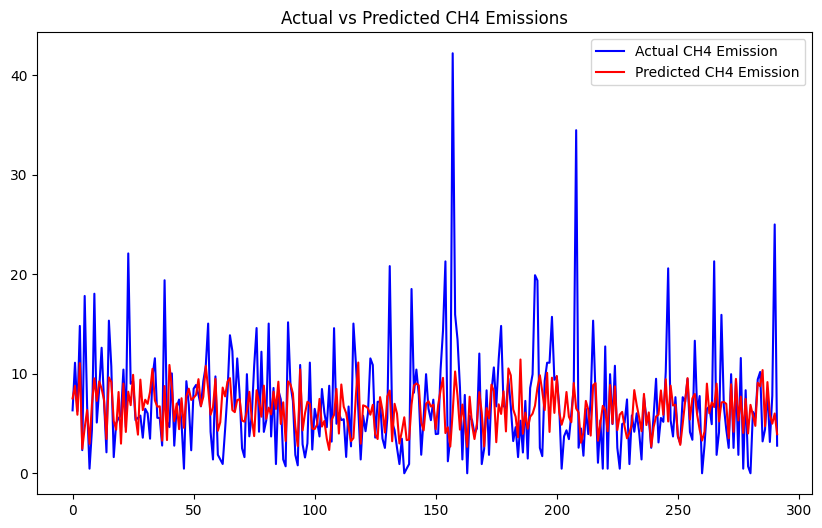

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Prepare your data (assuming you already have your data in `df`)

# Convert 'date' to a numeric format (you can skip if already done)
df['date'] = pd.to_datetime(df['date'])
df['date_numeric'] = df['date'].astype(np.int64) // 10**9  # Converting to UNIX timestamp (seconds)

# Define features and target variable
X = df[['date_numeric', 'Production Volume', 'humidity']]  # Features
y = df['CH4 emission']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = 5, alpha = 10, n_estimators = 100)

# Train the model
xg_reg.fit(X_train, y_train)

# Make predictions
y_pred = xg_reg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("XGBoost Model Performance")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Optionally, visualize the predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual CH4 Emission', color='blue')
plt.plot(y_pred, label='Predicted CH4 Emission', color='red')
plt.legend()
plt.title('Actual vs Predicted CH4 Emissions')
plt.show()


LSTM Predection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Sample data (replace this with your actual data)
# df = pd.read_csv('your_data.csv')

# Example columns: 'date', 'Production Volume', 'humidity', 'CH4 emission'
df['date'] = pd.to_datetime(df['date'])
df['date_numeric'] = df['date'].apply(lambda x: x.timestamp())

# Normalize the data (we'll use MinMaxScaler)
scaler = MinMaxScaler(feature_range=(0, 1))
df[['Production Volume', 'humidity', 'CH4 emission']] = scaler.fit_transform(df[['Production Volume', 'humidity', 'CH4 emission']])

# Define the features (X) and target (y)
X = df[['Production Volume', 'humidity', 'date_numeric']].values
y = df['CH4 emission'].values

# Reshape the data for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))  # (samples, time steps, features)
y = y.reshape(-1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))  # Output layer for predicting CH4 emission

model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()
# Train the LSTM model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)




Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 50)                  │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,851 (42.39 KB)

 Trainable params: 10,851 (42.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 219938614673408.0000 - val_loss: 8725931229184.0000
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3501267877888.0000 - val_loss: 197948358656.0000
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 54529499136.0000 - val_loss: 1813838976.0000
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1483870208.0000 - val_loss: 381088.4375
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20623684.0000 - val_loss: 47733.3047
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 482882.6875 - val_loss: 30068.8008
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16099.0332 - val_loss: 490.8068
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 263.7265 - val_loss: 48.4108
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.0372 - val_loss: 38.8789
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33.1193 - val_loss: 38.8789
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3

In [ ]:
# Use a separate scaler for CH4 emission target
target_scaler = MinMaxScaler(feature_range=(0, 1))
df['CH4 emission'] = target_scaler.fit_transform(df[['CH4 emission']])  # Scale target variable

# Now, create the X (features) and y (target) for training
X = df[['Production Volume', 'humidity', 'date_numeric']].values
y = df['CH4 emission'].values

# Reshape X for LSTM (samples, time steps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))  # (samples, time steps, features)
y = y.reshape(-1, 1)  # Make y a 2D array

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


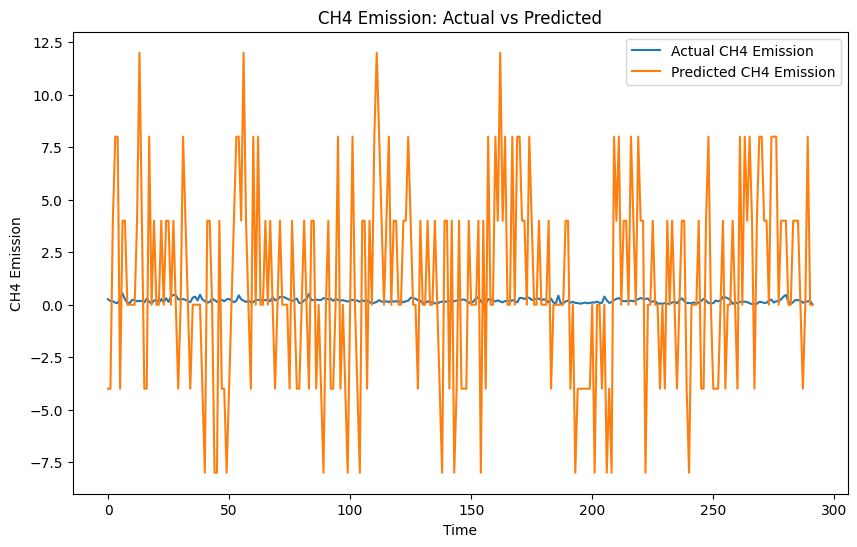

In [ ]:
# Make predictions with the trained model
y_pred = model.predict(X_test)

# Inverse transform the predicted values for CH4 emission (only)
y_pred_rescaled = target_scaler.inverse_transform(y_pred)  # Rescale only the CH4 emission predictions
y_test_rescaled = target_scaler.inverse_transform(y_test)  # Rescale the actual CH4 emission values

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test_rescaled, label='Actual CH4 Emission')
plt.plot(y_pred_rescaled, label='Predicted CH4 Emission')
plt.title('CH4 Emission: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('CH4 Emission')
plt.legend()
plt.show()


Random Forest Model enhancement

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest Model
Mean Absolute Error: 0.06178050966353854
Mean Squared Error: 0.006219439844280609
R-squared: 0.33091234838627703
Cross-validation MSE (negative): [-0.01012949 -0.01448641 -0.00835255 -0.01027084 -0.01008759]
Mean CV MSE: 0.010665375236322596


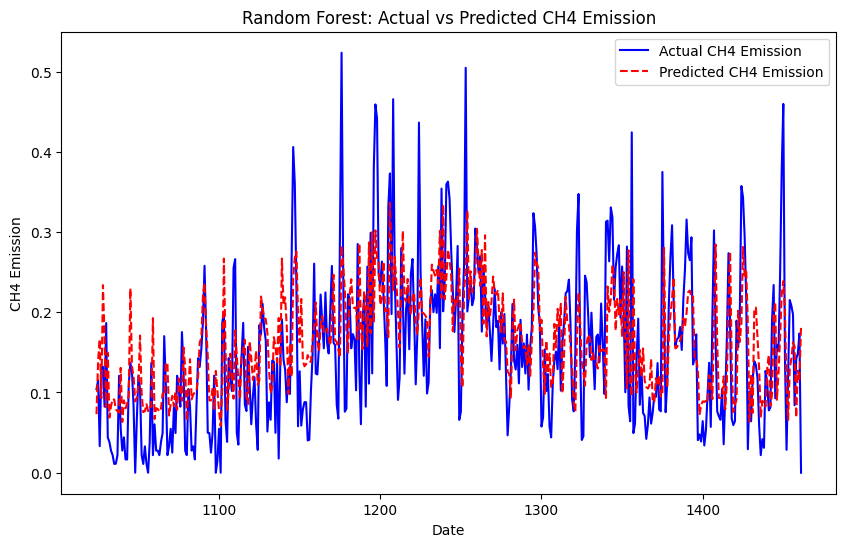

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the features (X) and target (y)
X = df[['Production Volume', 'humidity', 'date_numeric', 'CH4_lag_1', 'CH4_lag_2', 'year', 'month', 'day', 'weekday']]
y = df['CH4 emission']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Train the Random Forest Regressor
model_rf = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model_rf = grid_search.best_estimator_

# Make predictions
y_pred_rf = best_model_rf.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

# Cross-validation performance (on training data)
cv_scores = cross_val_score(best_model_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation MSE (negative):", cv_scores)
print("Mean CV MSE:", -cv_scores.mean())  # Invert to get positive MSE

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual CH4 Emission', color='blue')
plt.plot(y_test.index, y_pred_rf, label='Predicted CH4 Emission', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('CH4 Emission')
plt.title('Random Forest: Actual vs Predicted CH4 Emission')
plt.legend()
plt.show()


Comparing the models the Random forest Model is the best to fit but it needs enhacement